In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine learning and text data

If we have a corpus of texts, we first must preprocess those texts into a format the algorithms can understand. This usually means converting the representation of our text into numbers! We will do this using Scikit-learn, a popular Machine Learning library. 

# CountVectorizer

`CountVectorizer` will help us quickly tokenize text, learn its vocabulary, and encode the text as a vector for use in machine learning. This is often referred to as document encoding. 

Note that many ML operations in Scikit-learn is often a two-part process:

### Fit -> Transform

This means slightly different things based on the kind of ML algorithm you're using. Here, when dealing with document encoding, *fitting* means to tokenize texts and learning the vocabulary, while *transforming* means to (yes) transform the texts into vectors of numbers based on the encoding of that vocabulary. Our *model* will be this transformed dataset.

In [2]:
# Define a corpus
corpus = [
    "This is the first document.",
    "This is the second document.",
    "And the third one.",
    "Here we go with the fourth document?"
    ]

# Define an empty bag (of words)
vectorizer = CountVectorizer()

# Use the .fit method to tokenize the text and learn the vocabulary
vectorizer.fit(corpus)

# Print the vocabulary. Note: this yields a dictionary. What are the keys and values? 
vectorizer.vocabulary_

{'this': 11,
 'is': 6,
 'the': 9,
 'first': 2,
 'document': 1,
 'second': 8,
 'and': 0,
 'third': 10,
 'one': 7,
 'here': 5,
 'we': 12,
 'go': 4,
 'with': 13,
 'fourth': 3}

In [3]:
# Bonus, let's sort the vocabulary dictionary by value

vocab_dict = vectorizer.vocabulary_
print(type(vocab_dict))

<class 'dict'>


In [4]:
vocab_dict['and']

0

In [5]:
vocab_dict['with']

13

In [6]:
vocab_dict.values()

dict_values([11, 6, 9, 2, 1, 8, 0, 10, 7, 5, 12, 4, 13, 3])

In [7]:
vocab_dict.items()

dict_items([('this', 11), ('is', 6), ('the', 9), ('first', 2), ('document', 1), ('second', 8), ('and', 0), ('third', 10), ('one', 7), ('here', 5), ('we', 12), ('go', 4), ('with', 13), ('fourth', 3)])

Surely, there are not 0 'and' and 13 'with. The values are the column index for the vocabulary and the columns are in alphabetical order

In [8]:
print("Word-to-index mapping in the document-term matrix:")
for word in vocab_dict:
    print(f"Word: '{word}' -> Column index: {vocab_dict[word]}")

Word-to-index mapping in the document-term matrix:
Word: 'this' -> Column index: 11
Word: 'is' -> Column index: 6
Word: 'the' -> Column index: 9
Word: 'first' -> Column index: 2
Word: 'document' -> Column index: 1
Word: 'second' -> Column index: 8
Word: 'and' -> Column index: 0
Word: 'third' -> Column index: 10
Word: 'one' -> Column index: 7
Word: 'here' -> Column index: 5
Word: 'we' -> Column index: 12
Word: 'go' -> Column index: 4
Word: 'with' -> Column index: 13
Word: 'fourth' -> Column index: 3


The vocabulary_ dictionary maps each word to a column index in the document-term matrix. However, dictionaries are unordered by default, so if we want to see which word corresponds to each column in the matrix, we need to sort the dictionary items by their index value (the column number). This way, we can easily match each column in the matrix to the word it represents.

In other words, we are inverting the dictionary into a list

In [9]:
# Let's sort the vocabulary items by their assigned index (the value)
sorted_vocab = sorted(vocab_dict.items(), key=lambda item: item[1])

In [10]:
print("Column index : Word")
for word, idx in sorted_vocab:
    print(f"{idx} : {word}")

Column index : Word
0 : and
1 : document
2 : first
3 : fourth
4 : go
5 : here
6 : is
7 : one
8 : second
9 : the
10 : third
11 : this
12 : we
13 : with


In [11]:
print(type(sorted_vocab))
print(type(sorted_vocab[0]))

<class 'list'>
<class 'tuple'>


In [12]:
sorted_vocab[0]

('and', 0)

Dictionaries are really meant to be used through their keys for fast and efficient look up. But if the values are unique, such as in our case they are indices, it is possible to work with the values, too.

Now that we've `fit` our texts to a vocabulary, we can `transform` our texts into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

# Document term matrix

A [document term matrix](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) displays term frequencies that occur across a collection of documents. We want to encode the documents into a matrix to represent the frequencies of each vocabulary word across the documents.

However, representing our document-term matrix as a matrix where most values are 0 can end up costing us a lot of computing power. Performing operations across such a matrix may take a long time. So `sklearn` typically uses an alternate data structure to represent the data. Have a look:


In [13]:
vector = vectorizer.transform(corpus)

In [14]:
print(vector)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 21 stored elements and shape (4, 14)>
  Coords	Values
  (0, 1)	1
  (0, 2)	1
  (0, 6)	1
  (0, 9)	1
  (0, 11)	1
  (1, 1)	1
  (1, 6)	1
  (1, 8)	1
  (1, 9)	1
  (1, 11)	1
  (2, 0)	1
  (2, 7)	1
  (2, 9)	1
  (2, 10)	1
  (3, 1)	1
  (3, 3)	1
  (3, 4)	1
  (3, 5)	1
  (3, 9)	1
  (3, 12)	1
  (3, 13)	1


In [15]:
print(vector.shape)
print(type(vector))

(4, 14)
<class 'scipy.sparse._csr.csr_matrix'>


However, we can also take a look at our document-term matrix as a matrix where each row is a document and each column is a vocabulary word. We do this by calling the `.toarray()` method.

In [16]:
print(vector.toarray())

[[0 1 1 0 0 0 1 0 0 1 0 1 0 0]
 [0 1 0 0 0 0 1 0 1 1 0 1 0 0]
 [1 0 0 0 0 0 0 1 0 1 1 0 0 0]
 [0 1 0 1 1 1 0 0 0 1 0 0 1 1]]


The representation above is called a *compressed sparse row (csr) matrix*. A list of tuples is stored with each tuple containing the row and column index, and the value. It's an array that doesn't store the 0 values, just those where a token appears.

The column headers of this list could read **(document number, vocabulary word), frequency**.

*Note: the terms "sparse" and "dense" are often confused because they mean different thing in different contexts. In numerical analysis, a sparse matrix/array is one in which most of the elements are zero, while in dense matrices, most elements are non-zero (see [here](https://sebastianraschka.com/faq/docs/bag-of-words-sparsity.html) and [here](https://machinelearningmastery.com/sparse-matrices-for-machine-learning/)). However, in programming contexts, a sparse matrix is one in which the elements are not sequential, and they don't always start at 0 (while dense matrices do). [It all depends on how you define them](https://ask.sagemath.org/question/10554/is-it-a-sparse-matrix-or-dense-matrix/).*

In [17]:
# Look at the arrays in the above cell. 
# In which documents does "and" appear? 
# What about "document"? What about "the"?
print(vectorizer.get_feature_names_out())


['and' 'document' 'first' 'fourth' 'go' 'here' 'is' 'one' 'second' 'the'
 'third' 'this' 'we' 'with']


In [18]:
# What does this tell us? 
vectorizer.transform(['my new document is this']).toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]])

This code transforms the sentence 'my new document is this' into a vector using the vocabulary learned from your original corpus. The resulting array shows how many times each word from the original vocabulary appears in this new sentence. If a word from the vocabulary is present, its count will be greater than zero in the corresponding column; if not, it will be zero.

If the sentence contains words that were not in the original vocabulary (unseen words), those words are ignored. Only words that exist in the learned vocabulary are counted; unseen words always get a count of zero in the resulting vector. This means the model cannot represent new words it hasn’t seen during fitting.

Note that the kind of model we are building here does not take word order into account. It simply counts them per document! Put differently, `Countvectorizer` creates a **bag of words model**, which classifies a text by turning it into a "bag" of words to normalize and count them.


# Bigrams

In addition to uni-grams, using bigrams can be useful to preserve some ordering information. Here we can look at two (bi) or three (tri) or four (quad) or more words at a time! 

> NOTE: **`ngram_range=(1,2)`** will get you bigrams, **`ngram_range=(1,3)`** will get you tri-grams, **`ngram_range=(1,4)`** will get you quad-grams, etc. 

> **`token_pattern=r'\b\w+\b'`** is standard regex code to separate words.

We could also add many other parameters, such as `stop_words='english'` to add a stopwords list.

In [19]:
# Define a bigram bag of words 
bigram_vectorizer = CountVectorizer(ngram_range = (1,2),
                                    token_pattern = r'\b\w+\b')

In [20]:
# Analyze the bigram bag of words
analyze = bigram_vectorizer.build_analyzer()
analyze('Bigrams. Are cool!')

['bigrams', 'are', 'cool', 'bigrams are', 'are cool']

I thought we wanted bigrams? Why do we have single words?

Because we set `ngram_range=(1, 2)`, the vectorizer extracts both unigrams (single words) and bigrams (pairs of consecutive words) from your text. This means our feature set will include all individual words and all two-word combinations found in the corpus.

# Apply this idea to our `corpus` variable from above

In [21]:
corpus

['This is the first document.',
 'This is the second document.',
 'And the third one.',
 'Here we go with the fourth document?']

In [22]:
# Corpus transformation
bigram_array = bigram_vectorizer.fit_transform(corpus).toarray()
print(bigram_array)

[[0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1]]


In [23]:
# What are feature names? The column names! The rows are our documents :) 
print(bigram_vectorizer.get_feature_names_out())

['and' 'and the' 'document' 'first' 'first document' 'fourth'
 'fourth document' 'go' 'go with' 'here' 'here we' 'is' 'is the' 'one'
 'second' 'second document' 'the' 'the first' 'the fourth' 'the second'
 'the third' 'third' 'third one' 'this' 'this is' 'we' 'we go' 'with'
 'with the']


In [24]:
# Note that these counts are not word counts, but refer to the index of the word in the vocab
bigram_vectorizer.vocabulary_

{'this': 23,
 'is': 11,
 'the': 16,
 'first': 3,
 'document': 2,
 'this is': 24,
 'is the': 12,
 'the first': 17,
 'first document': 4,
 'second': 14,
 'the second': 19,
 'second document': 15,
 'and': 0,
 'third': 21,
 'one': 13,
 'and the': 1,
 'the third': 20,
 'third one': 22,
 'here': 9,
 'we': 25,
 'go': 7,
 'with': 27,
 'fourth': 5,
 'here we': 10,
 'we go': 26,
 'go with': 8,
 'with the': 28,
 'the fourth': 18,
 'fourth document': 6}

# Review - Exploring Data with Pandas

For this next section we will use a dataset called `music_reviews.csv` (collected from [Metacritic](https://www.metacritic.com/)), which includes album reviews from well-known music magazines. 

Let's first explore the data. This serves not only as a basic informative purpose, but also to ensure there are not any glaring errors. Our data includes both the actual review (in the "body" column) and the numeric score, so we can start by exploring the latter.

First, what genres are in this dataset, and how many reviews in each genre?

In [25]:
reviews = pd.read_csv("../Data/music_reviews.csv", sep = "\t")
print(reviews.shape)
reviews.head()

(5001, 7)


album           artist     genre         release_date  \
0              Don't Panic     All Time Low  Pop/Rock  2012-10-09 00:00:00   
1  Fear and Saturday Night     Ryan Bingham   Country  2015-01-20 00:00:00   
2       The Way I'm Livin'   Lee Ann Womack   Country  2014-09-23 00:00:00   
3                    Doris  Earl Sweatshirt       Rap  2013-08-20 00:00:00   
4                  Giraffe          Echoboy      Rock  2003-02-25 00:00:00   

       critic  score                                               body  
0    Kerrang!   74.0  While For Baltimore proves they can still writ...  
1       Uncut   70.0  There's nothing fake about the purgatorial nar...  
2  Q Magazine   84.0  All life's disastrous lows are here on a caree...  
3   Pitchfork   82.0  With Doris, Odd Future’s Odysseus is finally b...  
4    AllMusic   71.0  Though Giraffe is definitely Echoboy's most im...

In [26]:
reviews['genre'].value_counts()

genre
Pop/Rock                  1486
Indie                     1115
Rock                       932
Electronic                 513
Rap                        363
Pop                        149
Country                    140
R&B;                       112
Folk                        70
Alternative/Indie Rock      42
Dance                       41
Jazz                        38
Name: count, dtype: int64

In [29]:
# Who were the artists?
reviews.artist.value_counts().head(20)

# or

# reviews['artist'].value_counts().head(20)

artist
Various Artists      22
R.E.M.               16
Arcade Fire          14
Sigur Rós            13
Belle & Sebastian    12
Brian Eno            11
Radiohead            10
Bob Dylan            10
Kings of Leon        10
The Raveonettes      10
Mogwai               10
LCD Soundsystem      10
Weezer               10
Low                  10
M. Ward               9
Los Campesinos!       9
Wilco                 9
Ghostface Killah      9
Sun Kil Moon          9
Franz Ferdinand       9
Name: count, dtype: int64

In [30]:
# Who were the reviewers?
reviews['critic'].value_counts().head(20)

critic
AllMusic                     282
PopMatters                   228
Pitchfork                    207
Q Magazine                   178
Uncut                        171
Mojo                         137
Drowned In Sound             132
New Musical Express (NME)    127
The A.V. Club                121
Rolling Stone                112
Under The Radar              100
Spin                          97
The Guardian                  96
musicOMH.com                  88
Entertainment Weekly          87
Slant Magazine                83
Paste Magazine                72
Consequence of Sound          69
Alternative Press             69
Prefix Magazine               68
Name: count, dtype: int64

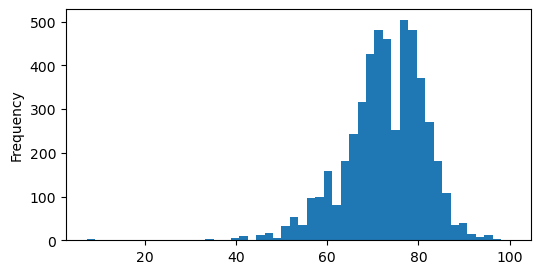

In [31]:
# What was the distribution of review scores like?
reviews['score'].plot(kind='hist', 
                      bins = 50, 
                      figsize = (6, 3)); 

In [32]:
# Remember .groupby? It allows us to group the scores by genre!
reviews_grouped_by_genre = reviews.groupby('genre')

# Now let's get the mean for all scores, sorting in descending order  
reviews_grouped_by_genre['score'].mean().sort_values(ascending=False)

genre
Jazz                      77.631579
Folk                      75.900000
Indie                     74.400897
Country                   74.071429
Alternative/Indie Rock    73.928571
Electronic                73.140351
Pop/Rock                  73.033782
R&B;                      72.366071
Rap                       72.173554
Rock                      70.754292
Dance                     70.146341
Pop                       64.608054
Name: score, dtype: float64

Together, let's make barplots for the number of reviews by genre.

In [33]:
# Get frequencies (counts) for the number of reviews by genre
reviews['genre'].value_counts()

genre
Pop/Rock                  1486
Indie                     1115
Rock                       932
Electronic                 513
Rap                        363
Pop                        149
Country                    140
R&B;                       112
Folk                        70
Alternative/Indie Rock      42
Dance                       41
Jazz                        38
Name: count, dtype: int64

In [34]:
# Convert this to a data frame
gen = pd.DataFrame(reviews['genre'].value_counts())

gen = gen.reset_index()
gen.columns =['GENRE', 'COUNT']

gen

GENRE  COUNT
0                 Pop/Rock   1486
1                    Indie   1115
2                     Rock    932
3               Electronic    513
4                      Rap    363
5                      Pop    149
6                  Country    140
7                     R&B;    112
8                     Folk     70
9   Alternative/Indie Rock     42
10                   Dance     41
11                    Jazz     38

/var/folders/z1/tqxrl8_52gq55yynq87bq3f40000gn/T/ipykernel_6792/2976862871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  gen_fig = sns.barplot(x = 'COUNT',


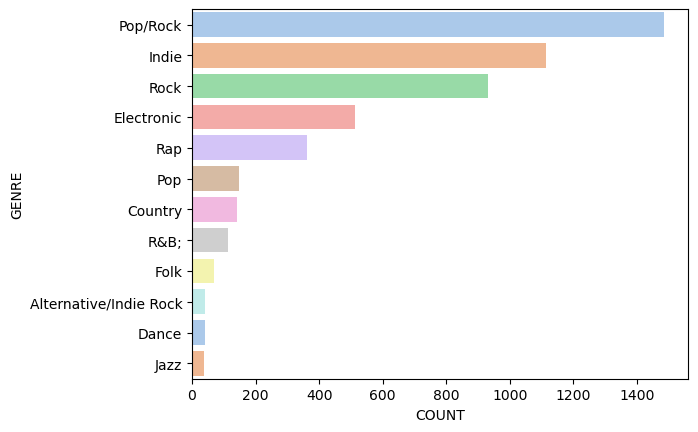

In [38]:
# Create the plot
gen_fig = sns.barplot(x = 'COUNT', 
                      y = 'GENRE', 
                      data = gen, 
                      orient = 'h',
                      palette = 'pastel')

We could also make barplots for average review score by genre and boxplots for the review scores by genre. 

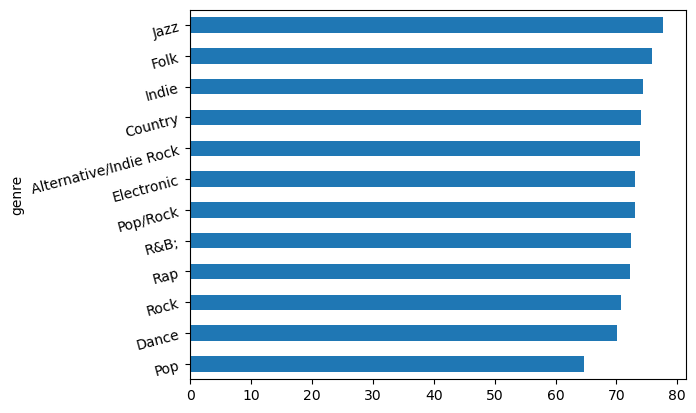

In [42]:
mean_review = reviews.groupby('genre')['score'].mean().sort_values()
mean_review.plot.barh(rot = 15);

/var/folders/z1/tqxrl8_52gq55yynq87bq3f40000gn/T/ipykernel_6792/188907599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "score", y = "genre", data = reviews, palette = 'rocket');


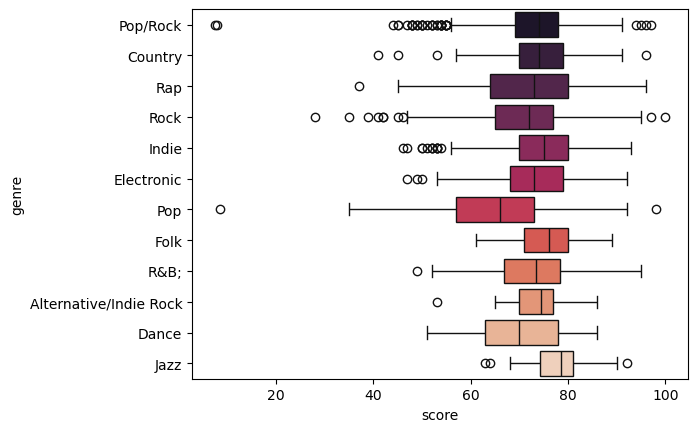

In [40]:
# Boxplots of average score by genre
sns.boxplot(x = "score", y = "genre", data = reviews, palette = 'rocket');

This boxplot shows the distribution of review scores for each genre. You can quickly compare the typical score/middle value (the median), the spread of scores (the interquartile range), and spot any outliers for each genre. It helps you see which genres tend to get higher or lower scores and how consistent the reviews are within each genre.

- **Median Score**: The *thick line inside each box* shows the median review score for each genre. For example, genres like Jazz and Dance have higher medians, while Pop and Pop/Rock have lower medians.

- **Spread (Interquartile Range)**: The *width of each box* shows the middle 50% of scores (from the 25th to 75th percentile). Genres like Pop and Pop/Rock have a wider spread, meaning their reviews are more varied, while Jazz and Dance are more tightly clustered.

- **Outliers**: The *dots outside the whiskers* are outliers—reviews that are unusually high or low compared to the rest. Some genres, like Pop/Rock and Rock, have more outliers, indicating occasional extreme reviews.

- **Consistency**: Genres with narrow boxes and short whiskers (like Jazz) have more consistent review scores, while those with wider boxes and longer whiskers (like Pop) have more variability.

> NOTE: remember that exploring your data with basic summary statistics and visualizations is a good first step before anything more complex!

# TF-IDF

[Term frequency–inverse document frequency (TFIDF)](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) can be thought of as an extension of `CountVectorizer`. However, instead of counting words, TFIDF identifies unique words within and across documents. We'll talk more about what it is later. First, let's recap a bit of data preprocessing.

Let's use Python's scikit-learn package again. We'll use `Counvectorizer` as we did before, but we'll also use a word weighting technique called TF-IDF (term frequency inverse document frequency) to identify important and discerning words within this dataset with Pandas.

We ask the question: **what words distinguish reviews of Rap albums, Indie Rock albums, and Jazz albums?**

In [43]:
reviews

album  \
0                             Don't Panic   
1                 Fear and Saturday Night   
2                      The Way I'm Livin'   
3                                   Doris   
4                                 Giraffe   
...                                   ...   
4996                          Outer South   
4997                         On An Island   
4998                             Movement   
4999                          Locked Down   
5000  And Their Refinement Of The Decline   

                                       artist     genre         release_date  \
0                                All Time Low  Pop/Rock  2012-10-09 00:00:00   
1                                Ryan Bingham   Country  2015-01-20 00:00:00   
2                              Lee Ann Womack   Country  2014-09-23 00:00:00   
3                             Earl Sweatshirt       Rap  2013-08-20 00:00:00   
4                                     Echoboy      Rock  2003-02-25 00:00:00   
...                                       ...       ...                  ...   
4996  Conor Oberst And The Mystic Valley Band     Indie  2009-05-05 00:00:00   
4997                            David Gilmour      Rock  2006-03-07 00:00:00   
4998                                   Gossip     Indie  2003-05-06 00:00:00   
4999                                 Dr. John  Pop/Rock  2012-04-03 00:00:00   
5000                         Stars Of The Lid      Rock  2007-04-07 00:00:00   

              critic  score                                               body  
0           Kerrang!   74.0  While For Baltimore proves they can still writ...  
1              Uncut   70.0  There's nothing fake about the purgatorial nar...  
2         Q Magazine   84.0  All life's disastrous lows are here on a caree...  
3          Pitchfork   82.0  With Doris, Odd Future’s Odysseus is finally b...  
4           AllMusic   71.0  Though Giraffe is definitely Echoboy's most im...  
...              ...    ...                                                ...  
4996  Slant Magazine   67.0  The result is an album that's unfortunately ba...  
4997       E! Online   67.0  In the end, Island makes Dave sound like he's ...  
4998           Uncut   81.0  Beth Ditto's remarkable gospel holler and ferv...  
4999      PopMatters   86.0  Dr. John is Dr. John. He's a star, and is on f...  
5000      PopMatters   87.0  Their work, especially that displayed on Refin...  

[5001 rows x 7 columns]

In [44]:
# View the first body entry
reviews["body"][0]

'While For Baltimore proves they can still write a grade A banger when they put their mind to it, too many songs are destined to have "must try harder" stamped on their report card. [13 Oct 2012, p.52]'

In [45]:
# Let's see if there is always a citation at the end of the review
# citation is indicated by square bracketts at the end of the review
reviews["body"].str.contains(r'\[.*\]$').value_counts()


body
False    4054
True      947
Name: count, dtype: int64

In [46]:
# let's see one review without citatation
print(reviews["body"][reviews["body"].str.contains(r'\[.*\]$') == False].iloc[0])

With Doris, Odd Future’s Odysseus is finally back and chasing the ghosts out of his head.


In [47]:
# Let's clean the reviews by removing the citations
reviews["body"] = reviews["body"].str.replace(r'\[.*\]$', '',
                                              regex=True)

In [48]:
# Let's see how we did
reviews["body"].str.contains(r'\[.*\]$').value_counts()

body
False    5001
Name: count, dtype: int64

In [49]:
# We will also remove numerical characters
reviews["body_without_numbers"] = reviews["body"].str.replace(r'\d+', '', regex=True)

In [50]:
reviews

album  \
0                             Don't Panic   
1                 Fear and Saturday Night   
2                      The Way I'm Livin'   
3                                   Doris   
4                                 Giraffe   
...                                   ...   
4996                          Outer South   
4997                         On An Island   
4998                             Movement   
4999                          Locked Down   
5000  And Their Refinement Of The Decline   

                                       artist     genre         release_date  \
0                                All Time Low  Pop/Rock  2012-10-09 00:00:00   
1                                Ryan Bingham   Country  2015-01-20 00:00:00   
2                              Lee Ann Womack   Country  2014-09-23 00:00:00   
3                             Earl Sweatshirt       Rap  2013-08-20 00:00:00   
4                                     Echoboy      Rock  2003-02-25 00:00:00   
...                                       ...       ...                  ...   
4996  Conor Oberst And The Mystic Valley Band     Indie  2009-05-05 00:00:00   
4997                            David Gilmour      Rock  2006-03-07 00:00:00   
4998                                   Gossip     Indie  2003-05-06 00:00:00   
4999                                 Dr. John  Pop/Rock  2012-04-03 00:00:00   
5000                         Stars Of The Lid      Rock  2007-04-07 00:00:00   

              critic  score  \
0           Kerrang!   74.0   
1              Uncut   70.0   
2         Q Magazine   84.0   
3          Pitchfork   82.0   
4           AllMusic   71.0   
...              ...    ...   
4996  Slant Magazine   67.0   
4997       E! Online   67.0   
4998           Uncut   81.0   
4999      PopMatters   86.0   
5000      PopMatters   87.0   

                                                   body  \
0     While For Baltimore proves they can still writ...   
1     There's nothing fake about the purgatorial nar...   
2     All life's disastrous lows are here on a caree...   
3     With Doris, Odd Future’s Odysseus is finally b...   
4     Though Giraffe is definitely Echoboy's most im...   
...                                                 ...   
4996  The result is an album that's unfortunately ba...   
4997  In the end, Island makes Dave sound like he's ...   
4998  Beth Ditto's remarkable gospel holler and ferv...   
4999  Dr. John is Dr. John. He's a star, and is on f...   
5000  Their work, especially that displayed on Refin...   

                                   body_without_numbers  
0     While For Baltimore proves they can still writ...  
1     There's nothing fake about the purgatorial nar...  
2     All life's disastrous lows are here on a caree...  
3     With Doris, Odd Future’s Odysseus is finally b...  
4     Though Giraffe is definitely Echoboy's most im...  
...                                                 ...  
4996  The result is an album that's unfortunately ba...  
4997  In the end, Island makes Dave sound like he's ...  
4998  Beth Ditto's remarkable gospel holler and ferv...  
4999  Dr. John is Dr. John. He's a star, and is on f...  
5000  Their work, especially that displayed on Refin...  

[5001 rows x 8 columns]

# `CountVectorizer` revisited

Let's first revisit `CountVectorizer` and see what kind of vocabulary we are dealing with in the music reviews. Whoa, that is a lot of words!

In [51]:
cv = CountVectorizer()
cv_bow = cv.fit_transform(reviews['body_without_numbers'])
print(cv_bow)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 122998 stored elements and shape (5001, 16096)>
  Coords	Values
  (0, 15711)	1
  (0, 5472)	1
  (0, 1017)	1
  (0, 10901)	1
  (0, 14260)	2
  (0, 1958)	1
  (0, 13455)	1
  (0, 15952)	1
  (0, 6076)	1
  (0, 1029)	1
  (0, 15699)	1
  (0, 11012)	1
  (0, 14217)	2
  (0, 8917)	1
  (0, 14455)	2
  (0, 7382)	1
  (0, 14502)	1
  (0, 8515)	1
  (0, 13026)	1
  (0, 668)	1
  (0, 3656)	1
  (0, 6403)	1
  (0, 9252)	1
  (0, 14758)	1
  (0, 6344)	1
  :	:
  (5000, 9694)	1
  (5000, 14203)	1
  (5000, 9635)	1
  (5000, 741)	1
  (5000, 479)	3
  (5000, 15897)	1
  (5000, 14197)	1
  (5000, 824)	1
  (5000, 14460)	1
  (5000, 15840)	1
  (5000, 9110)	1
  (5000, 13004)	1
  (5000, 9236)	1
  (5000, 1197)	1
  (5000, 14070)	1
  (5000, 5156)	1
  (5000, 12882)	1
  (5000, 9793)	1
  (5000, 10814)	1
  (5000, 13344)	1
  (5000, 11384)	1
  (5000, 4716)	1
  (5000, 12036)	1
  (5000, 4795)	1
  (5000, 3894)	1


This format is actually called Compressed Sparse Format and is useful because we can save huge document term matrices in this format - but it is difficult to look at for a human. Let's convert it to a format we are more familiar with - a dataframe. We call this object "dtm" as it is a document-term matrix - a matrix with all the terms and their counts in all the document. 

In [53]:
cv_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5001, 16096))

In [ ]:
dtm = pd.DataFrame(cv_bow.toarray(), columns=cv.get_feature_names_out(), index=reviews.index)
print(dtm.shape)

dtm.head(5)

(5001, 16096)


aa  aaaa  aahs  aaliyah  aaron  ab  abandon  abandoned  abandoning  abc  \
0   0     0     0        0      0   0        0          0           0    0   
1   0     0     0        0      0   0        0          0           0    0   
2   0     0     0        0      0   0        0          0           0    0   
3   0     0     0        0      0   0        0          0           0    0   
4   0     0     0        0      0   0        0          0           0    0   

   ...  zone  zones  zoo  zooey  zoomer  zu  zydeco  álbum  être  über  
0  ...     0      0    0      0       0   0       0      0     0     0  
1  ...     0      0    0      0       0   0       0      0     0     0  
2  ...     0      0    0      0       0   0       0      0     0     0  
3  ...     0      0    0      0       0   0       0      0     0     0  
4  ...     0      0    0      0       0   0       0      0     0     0  

[5 rows x 16096 columns]

Note most of the counts are 0: it's a sparse matrix. We're spending a lot of memory resources on zero values, which do not contain any useful information. This is why we use other representations such as Coordinate Lists or Compressed Sparse Matrices.

In [54]:
# Look at just the first row in its entirety
pd.set_option('display.max_rows', None)
dtm.iloc[0]

aa                      0
aaaa                    0
aahs                    0
aaliyah                 0
aaron                   0
ab                      0
abandon                 0
abandoned               0
abandoning              0
abc                     0
abdullah                0
abe                     0
aberrant                0
abhorrent               0
abides                  0
abilities               0
ability                 0
ablaze                  0
able                    0
ably                    0
abortively              0
abound                  0
abounds                 0
about                   0
aboutsonic              0
above                   0
abovei                  0
abrasive                0
abrupt                  0
absence                 0
absenceit               0
absent                  0
absolute                0
absolutely              0
absolution              0
absorb                  0
absorbed                0
absorbing               0
absorbs     

In [55]:
# Let's find the a cell in first row that has a value greater than 0
print(dtm.iloc[0][dtm.iloc[0] > 0])

are          1
baltimore    1
banger       1
can          1
card         1
destined     1
for          1
grade        1
harder       1
have         1
it           1
many         1
mind         1
must         1
on           1
proves       1
put          1
report       1
songs        1
stamped      1
still        1
their        2
they         2
to           2
too          1
try          1
when         1
while        1
write        1
Name: 0, dtype: int64


# What can we do with a DTM?

In [56]:
# Quickly identify the most frequent words:
dtm.sum().sort_values(ascending=False).head(20)

the      7386
and      4543
of       4385
to       3165
is       2907
it       2600
that     2036
in       1766
album    1715
this     1515
but      1436
with     1360
as       1302
on       1138
for      1072
are       808
you       775
their     772
an        750
his       735
dtype: int64

In [57]:
# View the most infrequent words:
dtm.sum().sort_values().head(20)

zen           1
zep           1
zest          1
zig           1
ziggety       1
zimgar        1
zing          1
zion          1
abounds       1
aboutsonic    1
abovei        1
abrasive      1
absenceit     1
zeal          1
zeitgeist     1
zeitgeists    1
abc           1
abdullah      1
abe           1
aberrant      1
dtype: int64

In [58]:
# View the average number of times each word is used in a review:
dtm.mean().sort_values(ascending=False).head(20)

the      1.476905
and      0.908418
of       0.876825
to       0.632873
is       0.581284
it       0.519896
that     0.407119
in       0.353129
album    0.342931
this     0.302939
but      0.287143
with     0.271946
as       0.260348
on       0.227554
for      0.214357
are      0.161568
you      0.154969
their    0.154369
an       0.149970
his      0.146971
dtype: float64

# TF-IDF scores

How to find distinctive words in a corpus is a long-standing question in text analysis. Today, we'll learn one simple approach to this: **TF-IDF**. 

The idea behind words scores is to weight words not just by their frequency, but by their frequency in one document compared to their distribution across all documents. *Words that are frequent, but are also used in every single document, will not be distinguishing.* We want to identify words that are unevenly distributed across the corpus using TF-IDF. By offsetting the frequency of a word by its document frequency (the number of documents in which it appears) will in theory filter out common terms such as 'the', 'of', and 'and'.

Traditionally, the inverse document frequency is calculated as such:

$$
\text{idf}_{\text{word}_1} = \frac{\text{number of documents}}{\text{number of documents with word}_1}
$$

so TF-IDF is:

$$
\text{tfidf}_{\text{word}_1} = \text{word}_1\_\text{frequency in document}_1 \times \frac{\text{number of documents}}{\text{number of documents with word}_1}
$$

You can, and often should, normalize the numerator (so there's no bias for longer or shorter documents). Otherwise, long documents (with lots of words) would affect the TF-IDF scores.

$$
\text{tfidf}_{\text{word}_1} = \left( \frac{\text{word}_1\_\text{frequency in document}_1}{\text{word count in document}_1} \right) \times \frac{\text{number of documents}}{\text{number of documents with word}_1}
$$

We can calculate all of this manually, but scikit-learn has a built-in function to do so. This function also uses log frequencies, so the numbers will not correspond excactly to the calculations above. We'll use the [scikit-learn calculation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

If you are interested in learning more about this topic and how it historically intersects with information retrieval (search) and more recently with retrieval augmented generation (RAG), [this](https://web.stanford.edu/~jurafsky/slp3/14.pdf) is a great place to start.

In [59]:
# Let's go back to our corpus for a bit and study what TF-IDF is
corpus

['This is the first document.',
 'This is the second document.',
 'And the third one.',
 'Here we go with the fourth document?']

In [60]:
# How many documents are there in the corpus?
number_of_documents = len(corpus)
print("Number of documents:", number_of_documents)

Number of documents: 4


In [61]:
# let's see the document frequency of 'document' in each of the 4 documents
from nltk import word_tokenize # why this and not split()?

number_of_documents_with_document = sum(1 for doc in corpus if 'document' in word_tokenize(doc))
print("Number of documents with the word document:", number_of_documents_with_document)


Number of documents with the word document: 3


Document frequency (df) of a term (t) is the number of documents it occurs in.

In [62]:
# What would be the inverse document frequency of the term "document"?

idf = number_of_documents/number_of_documents_with_document
print("Inverse Document Frequency for 'document':", idf)

Inverse Document Frequency for 'document': 1.3333333333333333


The inverse document frequency (idf) of a term is the document frequency (df) of a term “dampened” by the total number of documents. Usually, we take the log (log10 or natural log) of this ratio, which is what `TfidfVectorizer` does.

The goal is to ensure that very frequent words don’t dominate the results. The fewer documents a term appears in, the higher its idf weight; if a term appears in every document, its idf is lowest (often zero).



In [63]:
# Let's calculate the term frequency (TF) of 'document' in each document
tf = [word_tokenize(doc).count('document') for doc in corpus]
print(tf)


[1, 1, 0, 1]


In [64]:
# for each document, let's calculate the TF-IDF of 'document'

tf_idf = []
for i, doc in enumerate(corpus):
    tf_i = word_tokenize(doc).count('document')
    doc_length = len(word_tokenize(doc))
    if doc_length > 0:
        tf_normalized = tf_i / doc_length
    else:
        tf_normalized = 0
    tfidf_value = tf_normalized * idf
    tf_idf.append(tfidf_value)
    print(f"Document {i}: TF = {tf_i}, Doc Length = {doc_length}, TF_norm = {tf_normalized:.2f}, IDF = {idf:.2f}, TF-IDF = {tfidf_value:.4f}")


Document 0: TF = 1, Doc Length = 6, TF_norm = 0.17, IDF = 1.33, TF-IDF = 0.2222
Document 1: TF = 1, Doc Length = 6, TF_norm = 0.17, IDF = 1.33, TF-IDF = 0.2222
Document 2: TF = 0, Doc Length = 5, TF_norm = 0.00, IDF = 1.33, TF-IDF = 0.0000
Document 3: TF = 1, Doc Length = 8, TF_norm = 0.12, IDF = 1.33, TF-IDF = 0.1667


# TF-IDFVectorizer Function

To do so, we simply do the same thing we did before with `CountVectorizer`, but instead we use the function `TfidfVectorizer`

In [65]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

tfidfvec = TfidfVectorizer(min_df=2,lowercase=True,stop_words=stop)
# min_df=2 means we only consider words that appear in at least 2 documents

tfidf_bow = tfidfvec.fit_transform(reviews['body_without_numbers'])
print(tfidf_bow.toarray())
print(tfidf_bow.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5001, 7415)


Note that each word in each review now has a TF-IDF score attached to it.

Again, let's turn this into a (sparse) Pandas DataFrame: 

In [66]:
tfidf = pd.DataFrame(tfidf_bow.toarray(), columns=tfidfvec.get_feature_names_out(), index=reviews.index)
tfidf.head(5)

aa   ab  abandon  abandoned  abilities  ability  able  ably  abound  \
0  0.0  0.0      0.0        0.0        0.0      0.0   0.0   0.0     0.0   
1  0.0  0.0      0.0        0.0        0.0      0.0   0.0   0.0     0.0   
2  0.0  0.0      0.0        0.0        0.0      0.0   0.0   0.0     0.0   
3  0.0  0.0      0.0        0.0        0.0      0.0   0.0   0.0     0.0   
4  0.0  0.0      0.0        0.0        0.0      0.0   0.0   0.0     0.0   

   abrupt  ...  youthful   yr  zany  zeppelin  zero  zeros  zombies  zone  \
0     0.0  ...       0.0  0.0   0.0       0.0   0.0    0.0      0.0   0.0   
1     0.0  ...       0.0  0.0   0.0       0.0   0.0    0.0      0.0   0.0   
2     0.0  ...       0.0  0.0   0.0       0.0   0.0    0.0      0.0   0.0   
3     0.0  ...       0.0  0.0   0.0       0.0   0.0    0.0      0.0   0.0   
4     0.0  ...       0.0  0.0   0.0       0.0   0.0    0.0      0.0   0.0   

   zoo  über  
0  0.0   0.0  
1  0.0   0.0  
2  0.0   0.0  
3  0.0   0.0  
4  0.0   0.0  

[5 rows x 7415 columns]

Note that we still have a lot of zeroes – that is, documents in which certain words don't appear at all (and thus don't receive a TF-IDF score).

What are the words with the highest TF-IDF score across all documents?

In [67]:
# Look at the 20 words with highest tf-idf weights:
tfidf.max().sort_values(ascending=False).head(20)

best             1.0
perfect          1.0
one              1.0
showcase         1.0
authentic        1.0
acirc            1.0
works            1.0
awesome          1.0
surprises        1.0
misstep          1.0
brill            1.0
meh              1.0
king             1.0
likable          1.0
like             1.0
instrumentals    1.0
good             1.0
occasionally     1.0
thrilling        1.0
arranged         1.0
dtype: float64

These words are the most distinctive or important in at least one document, meaning they appear frequently in a specific document but not across all documents. This means that they are unique or characteristic terms in our corpus.

# Identifying Distinctive Words

What can we do with this? These scores are best used when you want to identify distinctive words for individual documents, or groups of documents, compared to other groups or the corpus as a whole. To illustrate this, let's compare three genres and identify the most distinctive words by genre.

First we add in a column of genre: 

In [68]:
tfidf['genre_'] = reviews['genre']
tfidf.head()

aa   ab  abandon  abandoned  abilities  ability  able  ably  abound  \
0  0.0  0.0      0.0        0.0        0.0      0.0   0.0   0.0     0.0   
1  0.0  0.0      0.0        0.0        0.0      0.0   0.0   0.0     0.0   
2  0.0  0.0      0.0        0.0        0.0      0.0   0.0   0.0     0.0   
3  0.0  0.0      0.0        0.0        0.0      0.0   0.0   0.0     0.0   
4  0.0  0.0      0.0        0.0        0.0      0.0   0.0   0.0     0.0   

   abrupt  ...   yr  zany  zeppelin  zero  zeros  zombies  zone  zoo  über  \
0     0.0  ...  0.0   0.0       0.0   0.0    0.0      0.0   0.0  0.0   0.0   
1     0.0  ...  0.0   0.0       0.0   0.0    0.0      0.0   0.0  0.0   0.0   
2     0.0  ...  0.0   0.0       0.0   0.0    0.0      0.0   0.0  0.0   0.0   
3     0.0  ...  0.0   0.0       0.0   0.0    0.0      0.0   0.0  0.0   0.0   
4     0.0  ...  0.0   0.0       0.0   0.0    0.0      0.0   0.0  0.0   0.0   

     genre_  
0  Pop/Rock  
1   Country  
2   Country  
3       Rap  
4      Rock  

[5 rows x 7416 columns]

In [69]:
tfidf['genre_'].head()

0    Pop/Rock
1     Country
2     Country
3         Rap
4        Rock
Name: genre_, dtype: object

Now let's compare the words with the highest tf-idf weight for each genre. We'll create three dataframes:

In [42]:
rap = tfidf[tfidf['genre_'] == 'Rap']
indie = tfidf[tfidf['genre_'] == 'Indie']
jazz = tfidf[tfidf['genre_'] == 'Jazz']

In [43]:
# Have a quick look
rap.head(3)

aa   ab  abandon  abandoned  abilities  ability  able  ably  abound  \
3   0.0  0.0      0.0        0.0        0.0      0.0   0.0   0.0     0.0   
18  0.0  0.0      0.0        0.0        0.0      0.0   0.0   0.0     0.0   
24  0.0  0.0      0.0        0.0        0.0      0.0   0.0   0.0     0.0   

    abrupt  ...   yr  zany  zeppelin  zero  zeros  zombies  zone  zoo  über  \
3      0.0  ...  0.0   0.0       0.0   0.0    0.0      0.0   0.0  0.0   0.0   
18     0.0  ...  0.0   0.0       0.0   0.0    0.0      0.0   0.0  0.0   0.0   
24     0.0  ...  0.0   0.0       0.0   0.0    0.0      0.0   0.0  0.0   0.0   

    genre_  
3      Rap  
18     Rap  
24     Rap  

[3 rows x 7416 columns]

In [46]:
rap['genre_'].head(3)

3     Rap
18    Rap
24    Rap
Name: genre_, dtype: object

In [47]:
# Note: max() gets the max value for each row 
# numeric_only() excludes the "genre_" column
rap.max(numeric_only=True).sort_values(ascending=False).head(10)

authentic     1.000000
strangely     1.000000
punch         0.940004
nearly        0.920600
eclectic      0.881803
blank         0.881652
try           0.793310
overwhelms    0.766667
tight         0.766556
waste         0.765176
dtype: float64

In [48]:
indie.max(numeric_only=True).sort_values(ascending=False).head(10)

occasionally     1.0
perfect          1.0
meh              1.0
likable          1.0
exquisite        1.0
awesome          1.0
excellent        1.0
instrumentals    1.0
showcase         1.0
brill            1.0
dtype: float64

In [49]:
jazz.max(numeric_only=True).sort_values(ascending=False).head(10)

purely        0.616157
apply         0.615712
taylor        0.574003
recordings    0.565781
williams      0.559498
descending    0.534176
playful       0.522539
minimalist    0.520692
performer     0.518281
urban         0.511509
dtype: float64

What does this tell us? For instance, it might be interesting that "authentic" is typically used in rap reviews, as well as terms like "tight" and "punch". Meanwhile, indie is connected with words like "likable" and "awesome", and jazz with more technical terminology like "minimalist", "innovative" and "descending".

In week 5 you will learn about topic modeling to see how machines can identify potentially abstract topics in text(s)!